In [39]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

c:\users\brian\pycharmprojects\tf_certification\tf_certif_venv\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: C:\Users\brian\PycharmProjects\tf_certification\course_2\sign_mnist_train.csv

  0%|          | 0.00/83.3M [00:00<?, ?B/s]
  1%|          | 524k/83.3M [00:00<00:38, 2.16MB/s]
  1%|1         | 1.05M/83.3M [00:00<00:47, 1.74MB/s]
  2%|1         | 1.57M/83.3M [00:00<00:39, 2.06MB/s]
  3%|2         | 2.10M/83.3M [00:01<00:39, 2.06MB/s]
  3%|3         | 2.62M/83.3M [00:01<00:41, 1.96MB/s]
  4%|3         | 3.15M/83.3M [00:01<00:42, 1.89MB/s]
  4%|4         | 3.67M/83.3M [00:01<00:42, 1.86MB/s]
  5%|5         | 4.19M/83.3M [00:02<00:43, 1.83MB/s]
  6%|5         | 4.72M/83.3M [00:02<00:44, 1.77MB/s]
  6%|6         | 5.24M/83.3M [00:02<00:48, 1.62MB/s]
 

In [3]:
# EXTRA
# gdown leaves at cwd, we must move these files into datasets/ directory

import os
os.rename('sign_mnist_test.csv', './datasets/sign_mnist_test.csv')
os.rename('sign_mnist_train.csv', './datasets/sign_mnist_train.csv')

In [4]:
TRAINING_FILE = './datasets/sign_mnist_train.csv'
VALIDATION_FILE = './datasets/sign_mnist_test.csv'

In [5]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

Parsing the dataset
Now complete the parse_data_from_input below.

This function should be able to read a file passed as input and return 2 numpy arrays, one containing the labels and one containing the 28x28 representation of each image within the file. These numpy arrays should have type float64.

A couple of things to keep in mind:

The first line contains the column headers, so you should ignore it.

Each successive line contains 785 comma-separated values between 0 and 255

The first value is the label

The rest are the pixel values for that picture

Tips:

csv.reader returns an iterable that returns a row of the csv file in each iteration. Following this convention, row[0] has the label and row[1:] has the 784 pixel values.

To reshape the arrays (going from 784 to 28x28), you can use functions such as np.array_split or np.reshape.

For type conversion of the numpy arrays, use the method np.ndarray.astype.

In [29]:
# GRADED FUNCTION: parse_data_from_input
def parse_data_from_input(filename):
  with open(filename) as file:
    ### START CODE HERE

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file, delimiter=",")

    labels = []
    images = []
    next(csv_reader) # ignore first line
    for row in csv_reader:
      labels.append(row[0])
      img_as_array = np.array_split(row[1:], 28)
      images.append(img_as_array)

    labels = np.array(labels).astype(float)
    images = np.array(images).astype(float)
    ### END CODE HERE

    return images, labels

In [30]:
# Test your function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


Expected Output:

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Testing images has shape: (7172, 28, 28)
Testing labels has shape: (7172,)

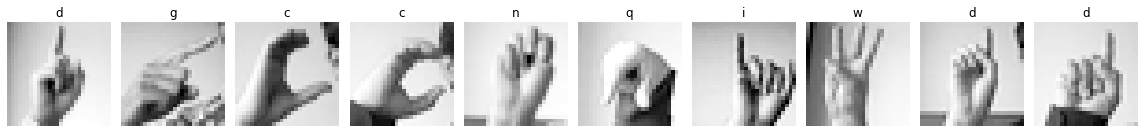

In [41]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [32]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  ### START CODE HERE

  # In this section you will have to add another dimension to the data
  # So, for example, if your array is (10000, 28, 28)
  # You will need to make it (10000, 28, 28, 1)
  # Hint: np.expand_dims
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(training_images,
                                       training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(validation_images,
                                                 validation_labels,
                                                 batch_size=32)

  ### END CODE HERE

  return train_generator, validation_generator

In [33]:
# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


Expected Output:

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [36]:
def create_model():

  ### START CODE HERE

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
  ])


  model.compile(optimizer = 'rmsprop',
                loss = 'sparse_categorical_crossentropy', # sparse categorical because its using numbers for labels
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [37]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 16s 18ms/step - loss: 2.7941 - accuracy: 0.1572 - val_loss: 1.9405 - val_accuracy: 0.3876
Epoch 2/15
858/858 [==============================] - 15s 17ms/step - loss: 2.1421 - accuracy: 0.3290 - val_loss: 1.4892 - val_accuracy: 0.5375
Epoch 3/15
858/858 [==============================] - 15s 17ms/step - loss: 1.7594 - accuracy: 0.4402 - val_loss: 1.0712 - val_accuracy: 0.6651
Epoch 4/15
858/858 [==============================] - 15s 17ms/step - loss: 1.4649 - accuracy: 0.5294 - val_loss: 0.9034 - val_accuracy: 0.6793
Epoch 5/15
858/858 [==============================] - 15s 17ms/step - loss: 1.2626 - accuracy: 0.5910 - val_loss: 0.6703 - val_accuracy: 0.7953
Epoch 6/15
858/858 [==============================] - 15s 17ms/step - loss: 1.0949 - accuracy: 0.6427 - val_loss: 0.6469 - val_accuracy: 0.7719
Epoch 7/15
858/858 [==============================] - 15s 17ms/step - loss: 0.9771 - accuracy: 0.6770 - val_loss: 0.5339 - val_accuracy:

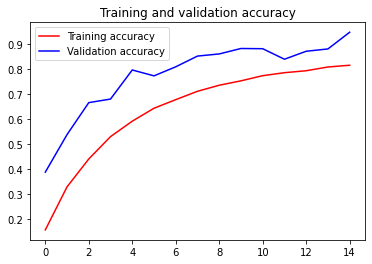

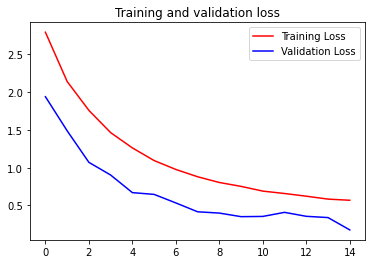

In [40]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()